## LIBRERIAS

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import pylab as plb

## VALORES DE X & Y

In [2]:
x = [1,2,3,4,5,6,7]
y = [0.5, 2.5, 2, 4, 3.5, 6, 5.5]

## SE CONVIERTEN LOS DATOS DE LISTAS A DATAFRAME CON PANDAS

In [3]:
dataf = pd.DataFrame(list(zip(x,y)), columns = ['x','y'])
dataf

,x,y
0,1,0.5
1,2,2.5
2,3,2.0
3,4,4.0
4,5,3.5
5,6,6.0
6,7,5.5


## FUNCIONES

In [4]:
#FUNCION QUE SUMA CADA ELEMTO DE UNA LISTA
def iter(lista):
    suma = 0
    for x in lista:
        suma = suma + x
    return suma

#FUNCION QUE ELEVA AL CUADRADO CADA ELEMENTO DE UNA LISTA Y RETORNA UNA LISTA 
def elevar(lista):
    l = []
    for x in lista:
        l.append(x**2)
    return l

#FUNCION PARA CALCULAR LOS VALORES DE LA COLUMNA (Y-A0-A1X)^2
def test(y,a_0,a_1,x):
    lista = []
    for value in range(len(x)):
        lista.append((y[value]-a_0-a_1*x[value])**2)
        # res = (y[value]-a_0-a_1*x[value])**2
        # lista.append(res)
    return lista

#FUNCION PARA CALCULAR LOS VALORES DE LA COLUMNA (Y-M)^2
def test2(y,m):
    lista = []
    for value in range(len(y)):
        lista.append((y[value]-m)**2)
    return lista

## VARIABLES

In [12]:
suma_y = iter(y) #TOTAL DE LA COLUMNA DE Y
promedio_y = suma_y/len(y) #PROMEDIO DE LA COLUMNA DE Y
suma_x = iter(x) #TOTAL DE LA COLUMNA DE X
cantidad = len(x) #CANTIDAD DE ELEMTOS 
x_por_y = [a*b for a,b in zip(x,y)] #PRODUCTOS DE LAS COLUMNAS DE X*Y
suma_x_por_y = iter(x_por_y) #TOTAL DE LA COLUMNA DE X*Y

x_ala_2 = elevar(x) #COLUMNA DE X^2
suma_x_ala_2 = iter(x_ala_2) #TOTAL DE LA COLUMNA DE X^2


vector = np.array([ [suma_y],[suma_x_por_y] ]) #VECTOR


matriz=np.array([[cantidad, suma_x],[suma_x,suma_x_ala_2]]) #MATRIZ
matriz_inv = np.linalg.inv(matriz) #MATRIZ INVERSA

a_0 = np.matmul(matriz_inv,vector)[0] #A0
a_1 = np.matmul(matriz_inv,vector)[1] #A1

f = test(y,a_0,a_1,x) #COLUMNA DE (Y-A0-A1X)^2
suma_f = iter(f) #TOTAL DE LA COLUMNA DE (Y-A0-A1X)^2

g = test2(y,promedio_y) #COLUMNA DE (Y-M)^2X
suma_g = iter(g) #TOTAL DE LA COLUMNA DE (Y-M)^2

coe_det = ((suma_g-suma_f)/suma_g)[0] #COEFICIENTE DE DETERMINACION
coe_corr = math.sqrt(coe_det) #COEFICIIENTE DE CORRELACION
sumas = [suma_x, suma_y, suma_x_por_y, suma_x_ala_2, suma_f, suma_g] #LISTA DE TODOS LOS TOTALES


## IMPRESION DE VECTOR, MATRIZ Y MATRIZ INVERSA

In [14]:
print(vector)
print()
print(matriz)
print()
print(matriz_inv)

[[ 24. ]
 [119.5]]

[[  7  28]
 [ 28 140]]

[[ 0.71428571 -0.14285714]
 [-0.14285714  0.03571429]]


## GRAFICA

Text(0.5, 1.0, 'Regresion Lineal')

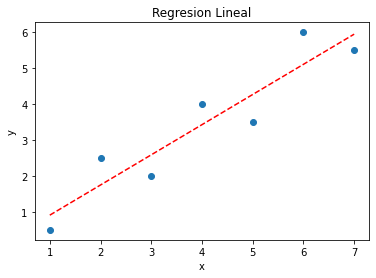

In [7]:
linea = a_0+a_1*x
plb.scatter(x,y)
plb.plot(x,linea,'r--')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresion Lineal")


## TABLA FINAL Y RESULTADOS

In [8]:
datafinal = pd.DataFrame(list(zip(x,y,x_por_y,x_ala_2,f,g)), columns = ['x','y','xy','x^2','(y-a_0-a_1*x)^2','(y-m)^2'])
datafinal.loc[7] = sumas
print(datafinal)
print()
print(f"y = {a_1[0]}x+{a_0[0]}")
print(f"Coeficiente de Determinacion: {coe_det}")
print(f"Coeficiente de Correlacion: {coe_corr}")



    x     y     xy  x^2        (y-a_0-a_1*x)^2    (y-m)^2
0   1   0.5    0.5    1  [0.16868622448979692]   8.576531
1   2   2.5    5.0    4   [0.5624999999999987]   0.862245
2   3   2.0    6.0    9  [0.34725765306122514]   2.040816
3   4   4.0   16.0   16  [0.32653061224489766]   0.326531
4   5   3.5   17.5   25   [0.5896045918367339]   0.005102
5   6   6.0   36.0   36   [0.7971938775510211]   6.612245
6   7   5.5   38.5   49  [0.19929846938775486]   4.290816
7  28  24.0  119.5  140    [2.991071428571428]  22.714286

y = 0.839285714285714x+0.07142857142857295
Coeficiente de Determinacion: 0.8683176100628932
Coeficiente de Correlacion: 0.9318356132188194
